In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scipy
from scipy.interpolate import interp1d
from scipy.stats import zscore
from scipy.signal import find_peaks


In [2]:
def plotting(file,num,threshold):
    '''
    Funciton used to plot the data of the Raman Spectroscopy, it intakes the name of the .txt file and splits it
    in x and y axis data to plot. also the num input is to define whether the y-axis is scaled by log10 or not
    '''
    
    x,y = np.loadtxt(file, unpack = True)
    
    # Calculate z-scores
    #z_scores = zscore(y)
    
    # Create a mask for values within the z-score threshold
    #mask = np.abs(z_scores) < threshold

    # Filter data based on the mask
    #filtered_x = x[mask]
    #filtered_y = y[mask]
    
    
    gradient = np.gradient(y, x)
    x, y = np.array(x), np.array(y)
    mask = np.abs(gradient) < threshold
    fw = x[mask]
    fi = y[mask]

    # Create an interpolation function using linear interpolation
    interp_func = interp1d(fw, fi, kind='linear', fill_value='extrapolate')

    # Extrapolate missing values
    ex_y = interp_func(x)

    
    if 10 == num :
        
        plt.plot(x,np.log10(ex_y),)
        plt.xlabel("Raman shift cm$^{-1}$")
        plt.ylabel("Intensity (counts)")
        plt.title("Raman Spectroscopy of LFP at 5% laser intensity")
        plt.legend([file])
        plt.grid(True)
    elif 2 == num:
        plt.plot(x,(ex_y)/2)
        plt.xlabel("Raman shift cm$^{-1}$")
        plt.ylabel("Intensity (counts)")
        plt.title("Raman Spectroscopy of LFP at 5% laser intensity")   
        plt.legend([file])
        plt.grid(True)
    elif 5 == num:
        plt.plot(x,(ex_y)/5)
        plt.xlabel("Raman shift cm$^{-1}$")
        plt.ylabel("Intensity (counts)")
        plt.title("Raman Spectroscopy of LFP at 5% laser intensity")   
        plt.legend([file])
        plt.grid(True)
    else:
        plt.plot(x,ex_y,)
        plt.xlabel("Raman shift cm$^{-1}$")
        plt.ylabel("Intensity (counts)")
        plt.title("Raman Spectroscopy of LFP at 5% laser intensity")   
        plt.legend([file])
        plt.grid(True)
        
    print(ex_y)
    return

In [3]:

# Define the range of interest
i1 = 200  # Adjust this to your specific range
f1 = 220    # Adjust this to your specific range

i2 = 270
f2 = 290

def peak (x1,x2):
    
    # Find peaks within the specified range
    range_mask = (x >= x1) & (x <= x2)
    p, _ = find_peaks(y[range_mask])

    # Get the corresponding coordinates
    p_x = x[range_mask][p]
    p_y = y[range_mask][p]


    print("The corresponding peak coordinates are",p_x,p_y)
    print("The highest peak is at","x=", p_x[1],"y=", p_y[1])



    # Plot the original data
    plt.plot(x, y, label='Original Data')

    # Mark the peaks on the plot within the specified range
    plt.scatter(p_x, p_y, color='red', marker='x', label='Peaks in Range')

    # Show the plot
    plt.xlim(x1,x2)
    plt.grid()
    plt.legend()
    plt.show()


In [4]:
def peak2 (file,x1,x2):
    
    x,y = np.loadtxt(file, unpack = True)
    
    # Find peaks within the specified range
    range_mask = (x >= x1) & (x <= x2)
    p, _ = find_peaks(y[range_mask])

    # Get the corresponding coordinates
    p_x = x[range_mask][p]
    p_y = y[range_mask][p]


    print("The corresponding peak coordinates are",p_x,p_y)
    print("The highest peak is at","x=", p_x[1],"y=", p_y[1])



    # Plot the original data
    plt.plot(x, y, label='Original Data')

    # Mark the peaks on the plot within the specified range
    plt.scatter(p_x, p_y, color='red', marker='x', label='Peaks in Range')

    # Show the plot
    plt.xlim(x1,x2)
    plt.grid()
    plt.legend()
    

    return plt.show(),p_x,p_y

In [5]:
def plot_spectra(file_path, target_x, target_y, threshold):
    # Organize the data
    data_dict = {}
    with open(file_path, 'r') as file:
        for line in file.readlines():
            x, y, wavenumber, intensity = map(float, line.split())
            coordinate = (x, y)
            if coordinate not in data_dict:
                data_dict[coordinate] = []
            data_dict[coordinate].append((wavenumber, intensity))

    # Extract the spectra for the desired coordinates
    spectra = data_dict.get((target_x, target_y), [])
    if not spectra:
        print(f'No data found for coordinate ({target_x}, {target_y})')
#        return

    # Convert spectra to NumPy arrays for z-score calculation and interpolation
    wavenumbers, intensities = zip(*spectra)
    wavenumbers, intensities = np.array(wavenumbers), np.array(intensities)

    # Calculate z-scores and remove outliers (considering values outside 3 standard deviations)
    gradient = np.gradient(intensities,wavenumbers)
    
    ##median_gradient = np.median(gradient)
    ##outliers = np.abs(gradient - median_gradient) > 2 * np.std(gradient)
    outliers = np.abs(gradient) < threshold
    
    #z_scores = zscore(intensities)
    #outliers = np.abs(z_scores) > threshold
    fw = wavenumbers[outliers]
    fi = intensities[outliers]
    #wavenumbers, intensities = wavenumbers[~outliers], intensities[~outliers]

    # Interpolate to fill gaps
    interpolate_function = interp1d(wavenumbers, intensities, kind='quadratic', fill_value='extrapolate')

    # Create a range of wavenumbers for smoother interpolation
    interpolated_wavenumbers = np.linspace(min(wavenumbers), max(wavenumbers), 3765)
    interpolated_intensities = interpolate_function(fw)

    # Plot the data
    plt.plot(fw, interpolated_intensities, label=f'Coordinate ({target_x}, {target_y})')
    
    
    plt.xlabel('Wavenumber')
    plt.ylabel('Intensity (counts)')
    plt.title(f'Spectra for Coordinate ({target_x}, {target_y}) with Z-Score and Interpolation')
    plt.grid(True)
    plt.legend()
    plt.show()
    #plt.plot(wavenumbers,np.abs(gradient),'.')
    return

In [6]:
def plot_spectra(file_path, target_x, target_y):
    # Organize the data
    data_dict = {}
    with open(file_path, 'r') as file:
        for line in file.readlines():
            x, y, wavenumber, intensity = map(float, line.split())
            coordinate = (x, y)
            if coordinate not in data_dict:
                data_dict[coordinate] = []
            data_dict[coordinate].append((wavenumber, intensity))

    # Plot the data for the desired coordinates
    for coordinate, spectra in data_dict.items():
        if coordinate[0] == target_x and coordinate[1] == target_y:
            wavenumbers, intensities = zip(*spectra)
            plt.plot(wavenumbers, intensities, label=f'Coordinate {coordinate}')

    plt.xlabel('Wavenumber')
    plt.ylabel('Intensity')
    plt.title(f'Spectra for Coordinate ({target_x}, {target_y})')
    plt.legend()
    plt.show()

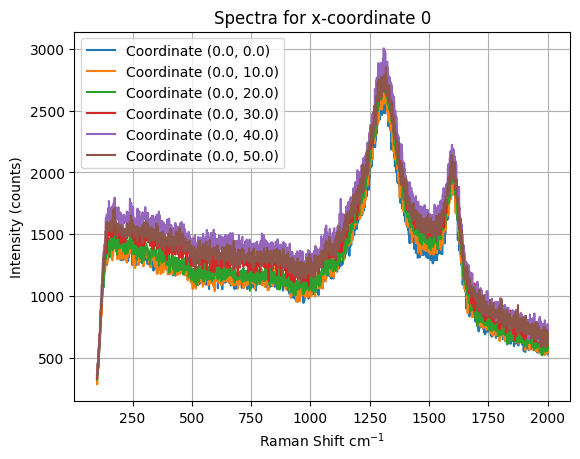

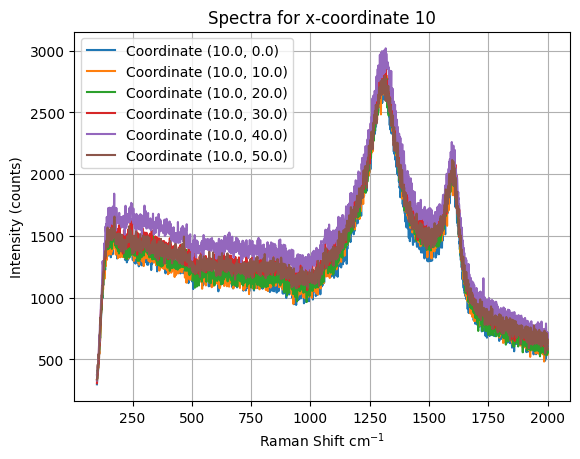

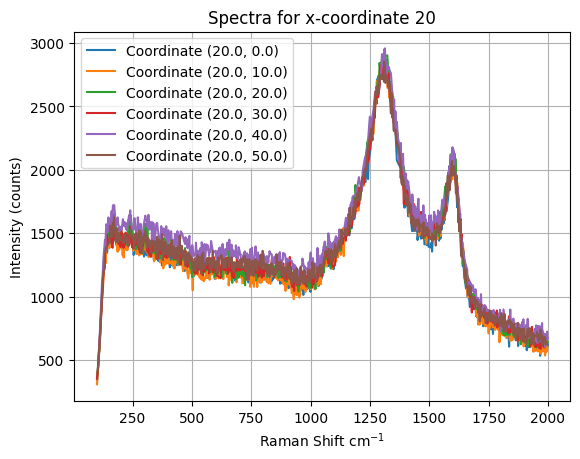

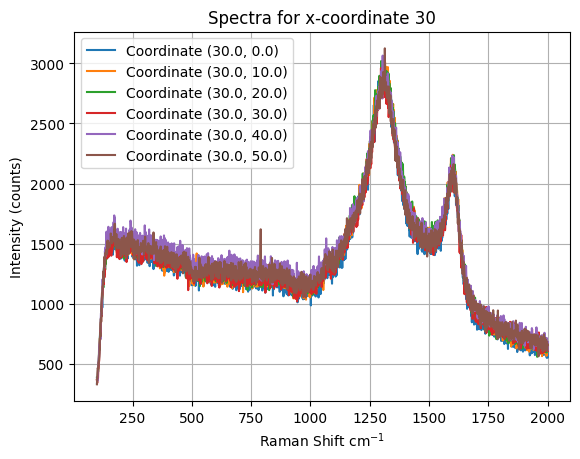

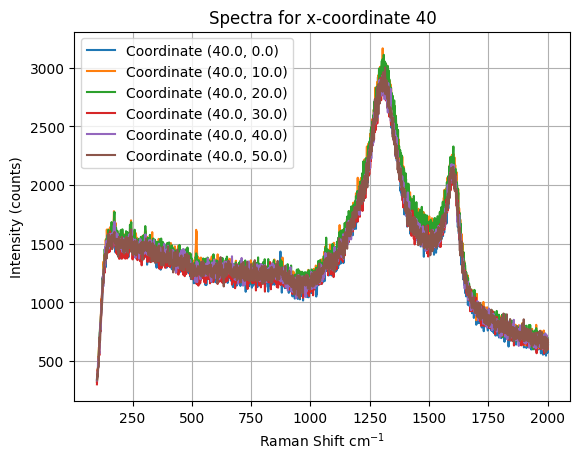

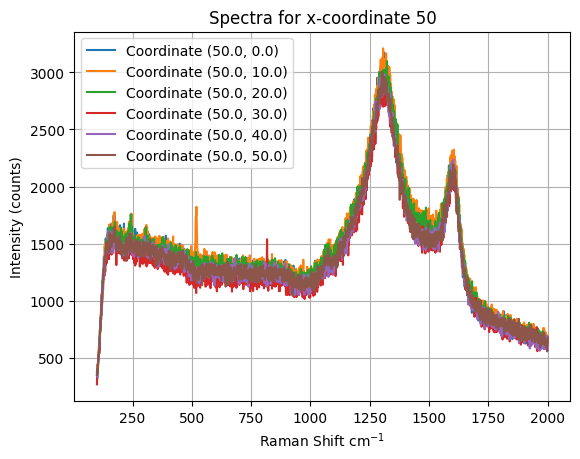

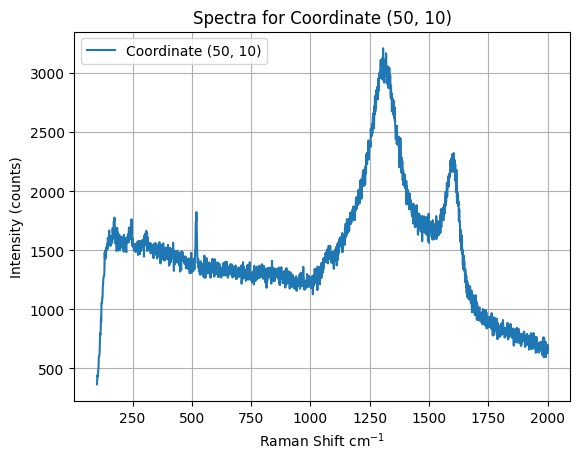

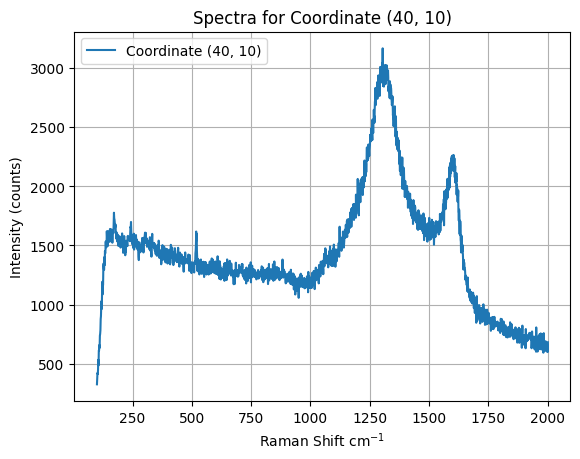

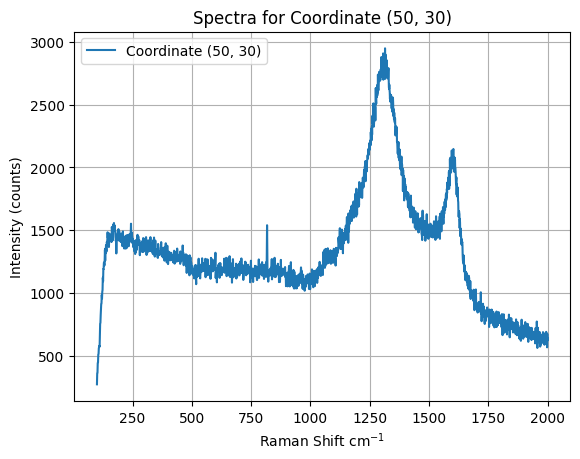

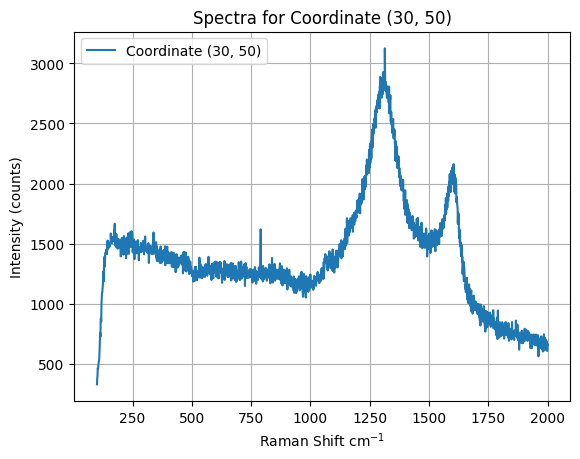

In [7]:
import numpy as np
import matplotlib.pyplot as plt

class SpectraPlotter:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data_dict = self._read_data()

    def _read_data(self):
        data_dict = {}
        with open(self.file_path, 'r') as file:
            for line in file.readlines():
                x, y, wavenumber, intensity = map(float, line.split())
                coordinate = (x, y)
                if coordinate not in data_dict:
                    data_dict[coordinate] = []
                data_dict[coordinate].append((wavenumber, intensity))
        return data_dict

    def plot_single(self, coordinate, threshold):
        # Plot the data for a single coordinate
        if coordinate not in self.data_dict:
            print(f'No data found for coordinate {coordinate}')
            return

        wavenumbers, intensities = zip(*self.data_dict[coordinate])
        gradient = np.gradient(intensities, wavenumbers)
        wavenumbers, intensities = np.array(wavenumbers), np.array(intensities)
        mask = np.abs(gradient) < threshold
        fw = wavenumbers[mask]
        fi = intensities[mask]
        plt.plot(fw, fi, label=f'Coordinate {coordinate}')

        plt.xlabel('Raman Shift cm$^{-1}$')
        plt.ylabel('Intensity (counts)')
        plt.title(f'Spectra for Coordinate {coordinate}')
        plt.grid()
        plt.legend()
        plt.show()

    def plot_more(self, target_x, threshold):
        # Plot the data for the specified x-coordinate
        for coordinate, spectra in self.data_dict.items():
            if coordinate[0] != target_x:
                continue  # Skip coordinates with different x

            wavenumbers, intensities = zip(*spectra)
            gradient = np.gradient(intensities, wavenumbers)
            wavenumbers, intensities = np.array(wavenumbers), np.array(intensities)
            mask = np.abs(gradient) < threshold
            fw = wavenumbers[mask]
            fi = intensities[mask]
            plt.plot(fw, fi, label=f'Coordinate {coordinate}')

        plt.xlabel('Raman Shift cm$^{-1}$')
        plt.ylabel('Intensity (counts)')
        plt.title(f'Spectra for x-coordinate {target_x}')
        plt.grid()
        plt.legend()
        plt.show()



    def plot_file(self, threshold,logarithmic=False):
         #Plot the data from the initialized file
        wavenumbers, intensities = self.data[:, 2], self.data[:, 3]
        gradient = np.gradient(intensities, wavenumbers)
        mask = np.abs(gradient) < threshold
        fw = wavenumbers[mask]
        fi = intensities[mask]

        plt.figure()
        if logarithmic:
            plt.semilogy(fw, fi, label='All Coordinates (Log Scale)')
        else:
            plt.plot(fw, fi, label='All Coordinates')

        plt.xlabel('Raman Shift cm$^{-1}$')
        plt.ylabel('Intensity (counts)')
        plt.title('Spectra for All Coordinates')
        plt.legend()
        plt.show()
        
    def plot_data_without_outliers(self, target_coordinates, lof_threshold):
        # Plot the data for desired coordinates without outliers
        for coordinate, spectra in self.data_dict.items():
            if coordinate not in target_coordinates:
                continue  # Skip coordinates that are not in the target list

            wavenumbers, intensities = zip(*spectra)
            X = np.column_stack((wavenumbers, intensities))

            # Calculate LOF scores
            lof_scores = self._calculate_lof(X)

            # Filter out points with higher LOF scores (lower density)
            filtered_indices = lof_scores < lof_threshold
            filtered_wavenumbers, filtered_intensities = np.array(wavenumbers)[filtered_indices], np.array(intensities)[filtered_indices]

            # Plot the data without outliers for the specific coordinate
            plt.scatter(filtered_wavenumbers, filtered_intensities, label=f'Data without Outliers for {coordinate}')

        plt.xlabel('Raman Shift cm$^{-1}$')
        plt.ylabel('Intensity (counts)')
        plt.title('Data without Outliers for Desired Coordinates')
        plt.legend()
        plt.show()

    def _calculate_lof(self, X):
        from sklearn.neighbors import LocalOutlierFactor
        lof = LocalOutlierFactor(n_neighbors=20)  # Adjust n_neighbors parameter
        lof_scores = -lof.fit_predict(X)
        return lof_scores

# Example usage:
spectra_plotter = SpectraPlotter('4.2V held electrode map 5% int 50x50 10-step.txt')
spectra_plotter.plot_more(0, 150)
spectra_plotter.plot_more(10, 150)
spectra_plotter.plot_more(20, 15)
spectra_plotter.plot_more(30, 150)
spectra_plotter.plot_more(40, 150)
spectra_plotter.plot_more(50, 150)

spectra_plotter.plot_single((50,10),130)
spectra_plotter.plot_single((40,10),130)
#plt.xlim(750,900)
spectra_plotter.plot_single((50,30),130)
#plt.xlim(750,800)
spectra_plotter.plot_single((30,50),150)



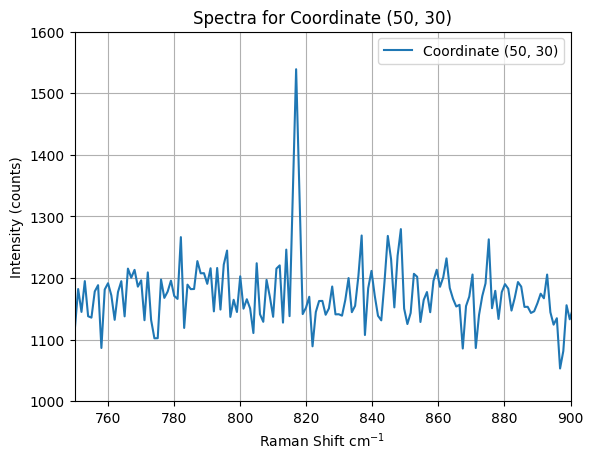

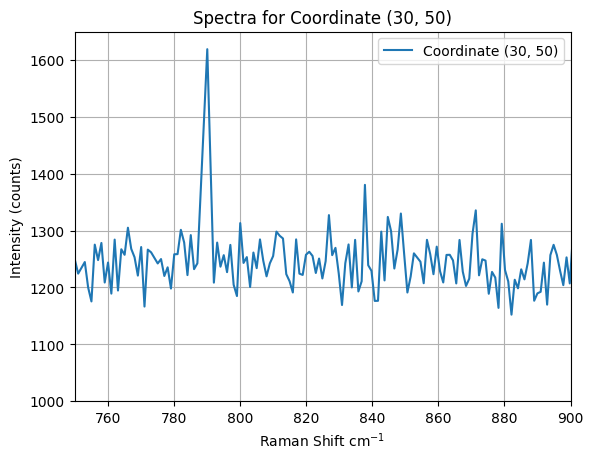

In [8]:
plt.xlim(750,900)
plt.ylim(1000,1600)
spectra_plotter.plot_single((50,30),130)
plt.xlim(750,900)
plt.ylim(1000,1650)
spectra_plotter.plot_single((30,50),150)

[794.599 867.702 892.98  ... 455.006 410.536 399.364]


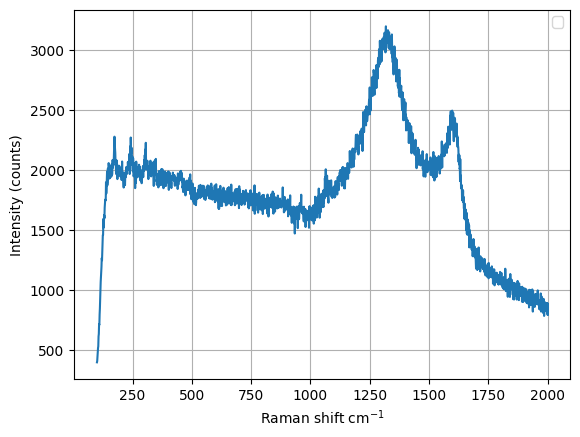

In [9]:
h = plotting('4.2V held electrode spot-3peakL.txt',0,200)
plt.title("")
plt.legend("")

[772.35  721.496 810.356 ... 412.834 348.401 370.521]
[499.008 584.825 533.881 ... 270.784 224.13  215.213]


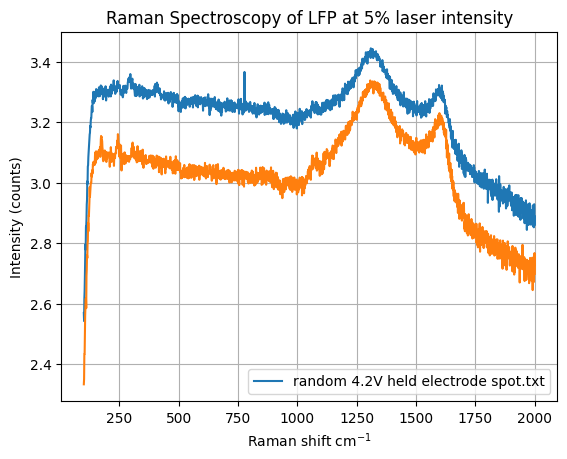

In [10]:
#b1= plotting('bright spot 4.2V held electrode.txt',10,200)
b2= plotting("near edge spot 4.2V held electrode.txt",10,200)
b3 = plotting('random 4.2V held electrode spot.txt',10,200)

[848.631 820.026 845.312 ... 466.103 412.755 390.489]


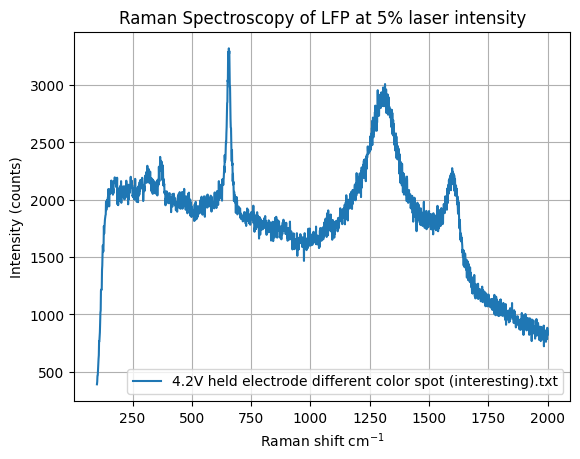

In [11]:
b4 = plotting('4.2V held electrode different color spot (interesting).txt',0,200)

In [12]:
    def plot_file(file, threshold,logarithmic=False):
         #Plot the data from the initialized file
        wavenumbers, intensities = np.loadtxt(file,unpack = True)
        gradient = np.gradient(intensities, wavenumbers)
        mask = np.abs(gradient) < threshold
        fw = wavenumbers[mask]
        fi = intensities[mask]

        plt.figure()
        if logarithmic:
            plt.semilogy(fw, fi, label='All Coordinates (Log Scale)')
        else:
            plt.plot(fw, fi, label='All Coordinates')

        plt.xlabel('Wavenumber')
        plt.ylabel('Intensity')
        plt.title('Spectra for All Coordinates')
        plt.grid()
        plt.legend()
        plt.show()

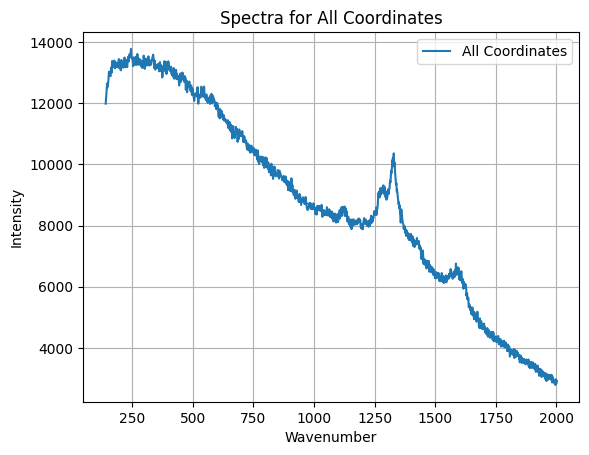

In [13]:
#p = plotting('bright af 4.2V held electrode (2).txt',0,200)
#plt.xlim(750,1000)
p = plot_file('bright af 4.2V held electrode.txt',71,logarithmic=False)

The corresponding peak coordinates are [1098.44 1096.55 1093.72 1091.84 1089.95 1086.18 1081.45 1079.56 1077.67
 1075.78 1072.94 1071.05 1068.2  1066.31 1062.52 1060.62 1058.72 1055.87
 1053.02 1051.12 1049.22 1044.47 1042.56 1039.71 1037.8  1031.13 1028.26
 1025.4  1022.53 1020.62 1016.8  1013.92 1008.18 1006.26 1003.39] [8315.27 8378.64 8474.92 8249.23 8328.43 8391.33 8291.25 8396.72 8327.63
 8401.29 8460.18 8393.79 8418.32 8483.9  8535.82 8387.84 8563.96 8382.97
 8602.14 8354.43 8393.51 8488.46 8461.78 8496.61 8506.68 8679.46 8562.17
 8612.54 8628.83 8638.82 8585.57 8646.26 8702.18 8485.17 8582.27]
The highest peak is at x= 1096.55 y= 8378.64


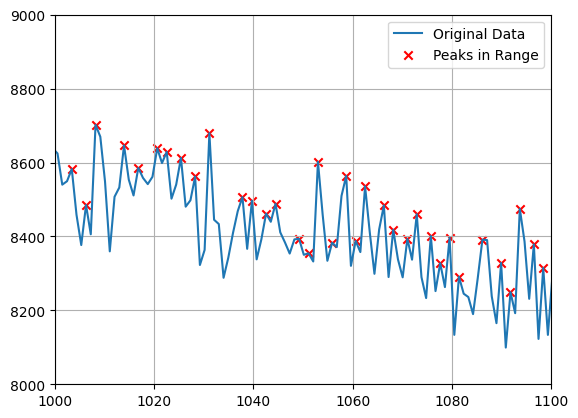

In [14]:
plt.ylim(8000,9000)
f = peak2('bright af 4.2V held electrode.txt',1000,1100)


In [15]:
x,y = (244.499,13780.9)
x,y = (336.106,13592.7)
x,y = (1122.87,8711.19)
x,y = (1282.63,9383.4)
x,y = (1328.8,10363.8)
x,y = (1420.8,7623.05)
x,y = (1585.4,6758.66)

In [16]:
from scipy.optimize import curve_fit
def lorentzian(x, A, mu, gamma):
    return A / (1 + ((x - mu) / (gamma / 2))**2)

In [17]:
def plotting_(file, num, threshold):
    '''
    Function used to plot the data of Raman Spectroscopy with multiple Lorentzian curves.
    '''

    x, y = np.loadtxt(file, unpack=True)

    # Calculate z-scores
    z_scores = zscore(y)

    # Create a mask for values within the z-score threshold
    mask = np.abs(z_scores) < threshold

    # Filter data based on the mask
    filtered_x = x[mask]
    filtered_y = y[mask]

    # Create an interpolation function using linear interpolation
    interp_func = interp1d(filtered_x, filtered_y, kind='linear', fill_value='extrapolate')

    # Extrapolate missing values
    ex_y = interp_func(x)

    if 10 == num:
        plt.plot(x, np.log10(ex_y), label=file)
    else:
        plt.plot(x, ex_y, label=file)
        
    # Perform Lorentzian fitting
    p0 = [19, 3000, 10000]  # Initial guess for Lorentzian parameters [A, mu, gamma]
    popt, _ = curve_fit(lorentzian, x, ex_y, p0=p0)

    # Generate the Lorentzian curve using optimized parameters
    lorentz_curve = lorentzian(x, *popt)

    # Plot the Lorentzian curve
    plt.plot(x, lorentz_curve, '--', label='Lorentzian Fit')


    plt.xlabel("Raman shift $cm^{-1}$")
    plt.ylabel("Intensity count u")
    plt.title("Raman Spectroscopy of LFP at 5% laser intensity")
    plt.legend()
    plt.grid(True)

    print(ex_y)
    return


Location of Lorentzian Peak: 909.5367516907992
Highest Intensity: 3885.570148072812
FWHM: 0.16385811161257044


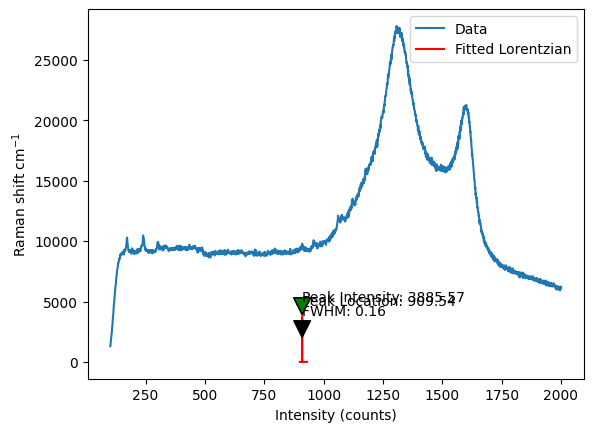

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def lorentzian(x, A, x0, gamma):
    return (A / np.pi) * (gamma / ((x - x0) ** 2 + gamma ** 2))

# Load example data
x, y = np.loadtxt('white side working 4.2V.txt', unpack=True)

# Define your range
x_min = 900
x_max = 930

# Subset the data
mask = (x >= x_min) & (x <= x_max)
x_subset = x[mask]
y_subset = y[mask]

# Initial guesses for the parameters [A, x0, gamma]
initial_guesses = [1000, np.mean(x_subset), 10]

# Set a larger number for maxfev and some bounds if appropriate
bounds = (0, [np.inf, np.inf, np.inf])  # Adjust bounds if needed

# Try to fit the curve within a try-except block to catch potential runtime errors
try:
    params, covariance = curve_fit(lorentzian, x_subset, y_subset, p0=initial_guesses, maxfev=10000, bounds=bounds)
    fitted_A, fitted_x0, fitted_gamma = params

except RuntimeError as e:
    print(f"An error occurred during curve fitting: {e}")


FWHM = 2 * fitted_gamma
max_value = (fitted_A / (np.pi * fitted_gamma))

plt.plot(x, y, label='Data')  # Plot original data

# Plot the fitted curve
x_fit = np.linspace(x_min, x_max, 1000)
y_fit = lorentzian(x_fit, fitted_A, fitted_x0, fitted_gamma)
plt.plot(x_fit, y_fit, '-r', label='Fitted Lorentzian')

# Annotations for FWHM and Max Value
plt.annotate(f'FWHM: {FWHM:.2f}', xy=(fitted_x0, max_value / 2), xytext=(fitted_x0 + 0.5 * FWHM, max_value),
             arrowprops=dict(facecolor='black', shrink=0.05),
            )
# Add annotations for the Peak Location and its Intensity
plt.annotate(f'Peak Location: {fitted_x0:.2f}', xy=(fitted_x0, max_value), xytext=(fitted_x0 + 0.5 * FWHM, max_value + 0.2 * max_value),
             arrowprops=dict(facecolor='blue', shrink=0.05),
             )
plt.annotate(f'Peak Intensity: {max_value:.2f}', xy=(fitted_x0, max_value), xytext=(fitted_x0 + 0.5 * FWHM, max_value + 0.3 * max_value),
             arrowprops=dict(facecolor='green', shrink=0.05),
            )
print(f"Location of Lorentzian Peak: {fitted_x0}")
print(f"Highest Intensity: {max_value}")
print(f"FWHM: {FWHM}")
plt.xlabel('Intensity (counts)')
plt.ylabel('Raman shift cm$^{-1}$')
plt.legend()
plt.show()


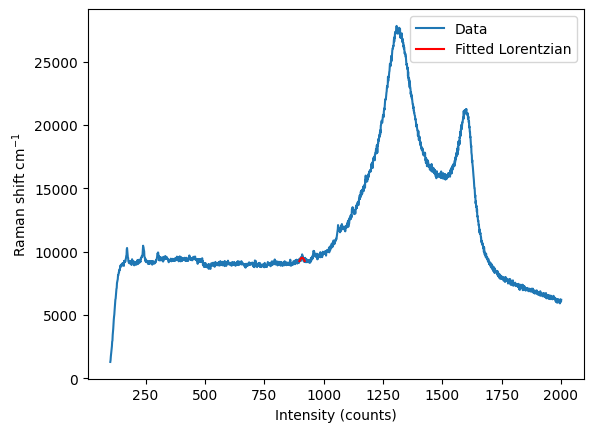

FWHM: 131.20654084123723
Maximum Value: 9519.993555518333
Location of Lorentzian Peak: 909.1422480549796
Highest Intensity: 9519.993555518333
FWHM: 131.20654084123723


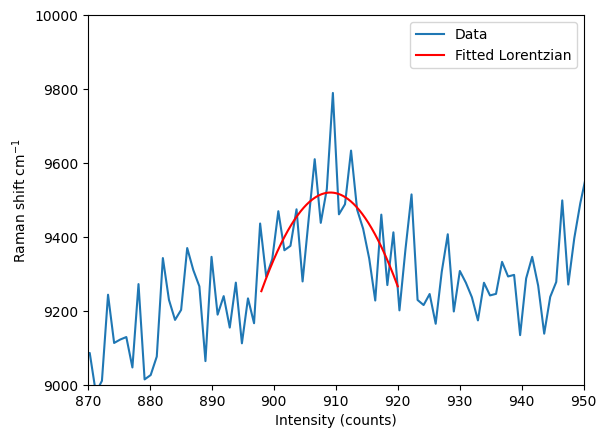

In [79]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def lorentzian(x, A, x0, gamma):
    return (A / np.pi) * (gamma / ((x - x0) ** 2 + gamma ** 2))

# Load example data
x, y = np.loadtxt('white side working 4.2V.txt', unpack=True)

# Define your range
x_min = 898
x_max = 920

# Subset the data
mask = (x >= x_min) & (x <= x_max)
x_subset = x[mask]
y_subset = y[mask]

# Initial guesses for the parameters [A, x0, gamma]
initial_guesses = [9519.993558127926, np.mean(x_subset), 131.20654490836128/2]

# Set a larger number for maxfev and some bounds if appropriate
bounds = (0, [np.inf, np.inf, np.inf])  # Adjust bounds if needed

# Try to fit the curve within a try-except block to catch potential runtime errors
try:
    params, covariance = curve_fit(lorentzian, x_subset, y_subset, p0=initial_guesses, maxfev=10000, bounds=bounds)
    fitted_A, fitted_x0, fitted_gamma = params

    # Plot original data
    plt.plot(x, y, label='Data')

    # Plot the fitted curve
    x_fit = np.linspace(x_min, x_max, 400)
    y_fit = lorentzian(x_fit, *params)
    plt.plot(x_fit, y_fit, '-r', label='Fitted Lorentzian')
    plt.xlabel('Intensity (counts)')
    plt.ylabel('Raman shift cm$^{-1}$')
    plt.legend()
    plt.show()

except RuntimeError as e:
    print(f"An error occurred during curve fitting: {e}")


FWHM = 2 * fitted_gamma
max_value = (fitted_A / (np.pi * fitted_gamma))
print(f"FWHM: {FWHM}")
print(f"Maximum Value: {max_value}")

plt.plot(x, y, label='Data')  # Plot original data

# Plot the fitted curve
x_fit = np.linspace(x_min, x_max, 400)
y_fit = lorentzian(x_fit, fitted_A, fitted_x0, fitted_gamma)
plt.plot(x_fit, y_fit, '-r', label='Fitted Lorentzian')

# Annotations for FWHM and Max Value
#plt.annotate(f'FWHM: {FWHM:.2f}', xy=(fitted_x0, max_value / 2), xytext=(fitted_x0 + 0.5 * FWHM, max_value),
 #            arrowprops=dict(facecolor='black', shrink=0.05),
  #           )
#plt.annotate(f'Max Value: {max_value:.2f}', xy=(fitted_x0, max_value), xytext=(fitted_x0, max_value + 0.1 * max_value),
#             arrowprops=dict(facecolor='black', shrink=0.05),
  #           )
# Add annotations for the Peak Location and its Intensity
#plt.annotate(f'Peak Location: {fitted_x0:.2f}', xy=(fitted_x0, max_value), xytext=(fitted_x0 + 0.5 * FWHM, max_value + 0.2 * max_value),
 #            arrowprops=dict(facecolor='blue', shrink=0.05),
  #           )
#plt.annotate(f'Peak Intensity: {max_value:.2f}', xy=(fitted_x0, max_value), xytext=(fitted_x0 + 0.5 * FWHM, max_value + 0.3 * max_value),
 #            arrowprops=dict(facecolor='green', shrink=0.05),
  #          )

# Print out the values
print(f"Location of Lorentzian Peak: {fitted_x0}")
print(f"Highest Intensity: {max_value}")
print(f"FWHM: {FWHM}")

plt.xlim(870,950)
plt.ylim(9000,10000)
plt.xlabel('Intensity (counts)')
plt.ylabel('Raman shift cm$^{-1}$')
plt.legend()
plt.show()


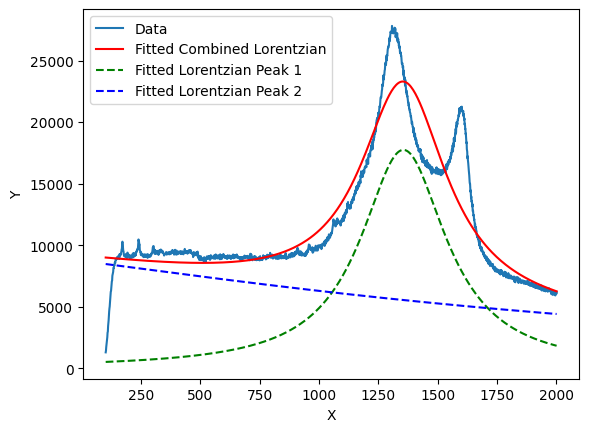

In [145]:
def combined_lorentzian(x, A1, x01, gamma1, A2, x02, gamma2):
    L1 = (A1 / np.pi) * (gamma1 / ((x - x01) ** 2 + gamma1 ** 2))
    L2 = (A2 / np.pi) * (gamma2 / ((x - x02) ** 2 + gamma2 ** 2))
    return L1 + L2

# Example data arrays, replace with your actual data
x,y = np.loadtxt('white side working 4.2V.txt', unpack = True)

# Initial guesses for the parameters [A1, x01, gamma1, A2, x02, gamma2]
# You'll need a good guess to start with, possibly based on visual inspection of the data
initial_guesses = [max(y), x[np.argmax(y)], 1, max(y), x[np.argmax(y)] + 20, 1]

# Fit the curve using the combined Lorentzian function
params, covariance = curve_fit(combined_lorentzian, x, y, p0=initial_guesses)

# Extract the parameters
fitted_A1, fitted_x01, fitted_gamma1, fitted_A2, fitted_x02, fitted_gamma2 = params

# Plot original data
plt.plot(x, y, label='Data')

# Plot the fitted curves
x_fit = np.linspace(min(x), max(x), 400)
y_fit = combined_lorentzian(x_fit, *params)
plt.plot(x_fit, y_fit, '-r', label='Fitted Combined Lorentzian')

# Individual peaks for clarity
y_fit_peak1 = lorentzian(x_fit, fitted_A1, fitted_x01, fitted_gamma1)
y_fit_peak2 = lorentzian(x_fit, fitted_A2, fitted_x02, fitted_gamma2)
plt.plot(x_fit, y_fit_peak1, '--g', label='Fitted Lorentzian Peak 1')
plt.plot(x_fit, y_fit_peak2, '--b', label='Fitted Lorentzian Peak 2')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()



In [146]:

'''
    # Initialize arrays to store Lorentzian curves
    lorentz_curves = np.zeros_like(x)

    # Fit and generate Lorentzian curves for each Lorentzian
    for i in range(num_lorentzians):
        lorentz_params = lorentzian_params[i * 3: (i + 1) * 3]  # A, mu, gamma for the i-th Lorentzian
        popt, _ = curve_fit(lorentzian, x, ex_y, p0=loretnz_params)

        # Generate the Lorentzian curve using optimized parameters
        lorentz_curve = lorentzian(x, *popt)

        # Add the Lorentzian curve to the sum of Lorentzian curves
        lorentz_curves += lorentz_curve

        # Plot the Lorentzian curve
        plt.plot(x, lorentz_curve, '--', label=f'Lorentzian {i + 1}')'''

"\n    # Initialize arrays to store Lorentzian curves\n    lorentz_curves = np.zeros_like(x)\n\n    # Fit and generate Lorentzian curves for each Lorentzian\n    for i in range(num_lorentzians):\n        lorentz_params = lorentzian_params[i * 3: (i + 1) * 3]  # A, mu, gamma for the i-th Lorentzian\n        popt, _ = curve_fit(lorentzian, x, ex_y, p0=loretnz_params)\n\n        # Generate the Lorentzian curve using optimized parameters\n        lorentz_curve = lorentzian(x, *popt)\n\n        # Add the Lorentzian curve to the sum of Lorentzian curves\n        lorentz_curves += lorentz_curve\n\n        # Plot the Lorentzian curve\n        plt.plot(x, lorentz_curve, '--', label=f'Lorentzian {i + 1}')"

[16143.   15942.9  16222.8  ...  4620.11  4007.17  3498.67]


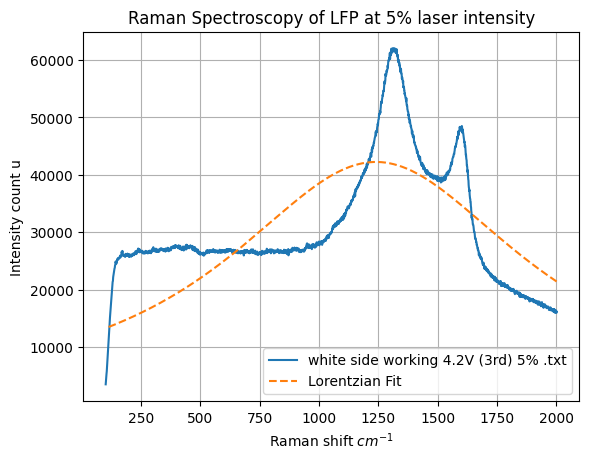

In [147]:
h = plotting_('white side working 4.2V (3rd) 5% .txt',0,1000)

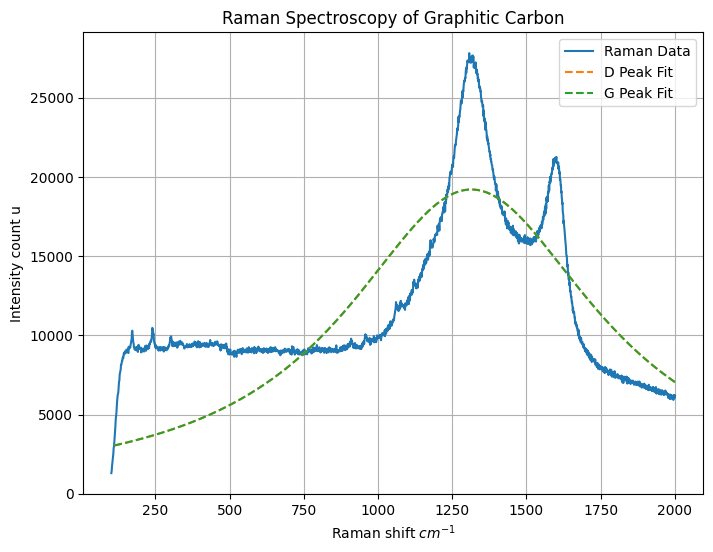

Optimized Parameters for D Peak (A_d, mu_d, gamma_d): [19204.74521027  1314.63169361  1045.02155738]
Optimized Parameters for G Peak (A_g, mu_g, gamma_g): [19204.10921653  1314.62300869  1045.10523662]


In [148]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def lorentzian(x, A, mu, gamma):
    return A / (1 + ((x - mu) / (gamma / 2))**2)

# Raman spectroscopy data (x and y)
x,y = np.loadtxt('white side working 4.2V.txt', unpack = True)
# Load your data into these arrays

# Parse the data into numpy arrays
#lines = data.strip().split('\n')
#x, y = zip(*(map(float, line.split()) for line in lines))

# Initial parameter guesses for D and G peaks
initial_guess_D = [19204.9749619, 1314.63505451, 1044.9913227]  # A_d, mu_d, gamma_d
initial_guess_G = [15000, 1580, 20]  # A_g, mu_g, gamma_g

# Fit the D peak Lorentzian
popt_D, _ = curve_fit(lorentzian, x, y, p0=initial_guess_D)

# Fit the G peak Lorentzian
popt_G, _ = curve_fit(lorentzian, x, y, p0=initial_guess_G)

# Generate the Lorentzian curves for D and G peaks using optimized parameters
lorentz_curve_D = lorentzian(x, *popt_D)
lorentz_curve_G = lorentzian(x, *popt_G)

# Plot the original data and fitted Lorentzian curves
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Raman Data')
plt.plot(x, lorentz_curve_D, '--', label='D Peak Fit')
plt.plot(x, lorentz_curve_G, '--', label='G Peak Fit')
plt.xlabel("Raman shift $cm^{-1}$")
plt.ylabel("Intensity count u")
plt.title("Raman Spectroscopy of Graphitic Carbon")
plt.legend()
plt.grid(True)
plt.show()

# Print optimized parameters for D and G peaks
print("Optimized Parameters for D Peak (A_d, mu_d, gamma_d):", popt_D)
print("Optimized Parameters for G Peak (A_g, mu_g, gamma_g):", popt_G)


[6775.9  6756.85 7063.67 ... 3145.09 2780.81 2500.92]
[34400.2  34997.2  35165.9  ...  9193.51  8043.06  7145.79]


(0.0, 1500.0)

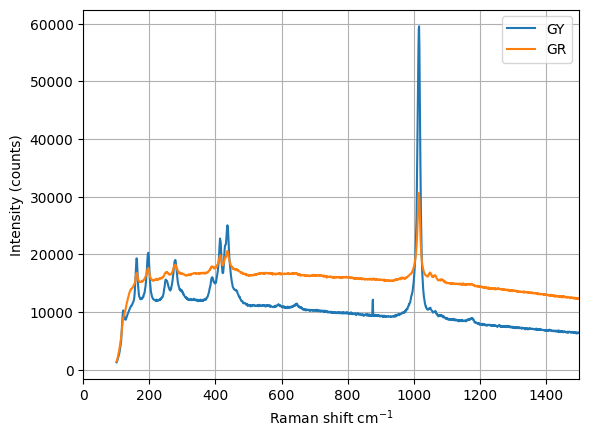

In [155]:
import matplotlib.patches as patches
#h = plotting('white side working 4.2V.txt',0,130)

h3 = plotting('10acc 5th GY FePO4.txt',2,18000)
h2 = plotting('10acc 5th GR FePO4.txt',5,14000000)
plt.title("")
plt.legend(["GY","GR"])
#plt.ylim(top = 77000)
plt.xlim(0,1500)
#plt.legend(["F", "GY FP"])
#ellipse = patches.Ellipse((1125, 13000), width=50, height=2500,edgecolor='r', facecolor='none')
#plt.gca().add_patch(ellipse)
#plt.axvline(x=1175, color = 'r', linestyle = '--')
#plt.axvline(x=1078, color = 'r', linestyle = '--')
#plt.axvline(x=173, color = 'r', linestyle = '--')
#plt.axvline(x=240, color = 'r', linestyle = '--')
#plt.axvline(x=302, color = 'r', linestyle = '--')

#plt.show()

[5999.06       6055.2        6111.34       ... 1803.63081297 1553.77125811
 1303.69      ]
[6775.9  6756.85 7063.67 ... 3145.09 2780.81 2500.92]


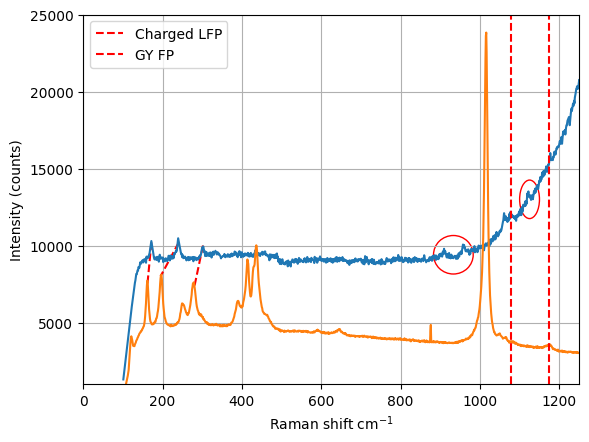

In [156]:
import matplotlib.patches as patches

#first peak
x1, y1 = 172, 10200
x2, y2 = 162, 7500
plt.plot([x1, x2], [y1, y2], color = 'r',linestyle = '--')

#second peak
x3, y3 = 241, 10200
x4, y4 = 195, 8000
plt.plot([x3, x4], [y3, y4], color = 'r',linestyle = '--')

#third peak
x5, y5 = 302, 10000
x6, y6 = 280, 7300
plt.plot([x5, x6], [y5, y6], color = 'r',linestyle = '--')

h = plotting('white side working 4.2V.txt',0,130)
#plt.legend("F")
h3 = plotting('10acc 5th GY FePO4.txt',5,18000)
#h2 = plotting('10acc 5th GR FePO4.txt',5,14000000)
plt.title("")
#plt.ylim(top = 77000)
plt.xlim(0,1250)
plt.ylim(1000,25000)
plt.legend(["Charged LFP", "GY FP"])
ellipse = patches.Ellipse((1125, 13000), width=50, height=2500,edgecolor='r', facecolor='none')
plt.gca().add_patch(ellipse)
french = patches.Ellipse((933, 9400), width=100, height=2500,edgecolor='r', facecolor='none')
plt.gca().add_patch(french)
plt.axvline(x=1175, color = 'r', linestyle = '--')
plt.axvline(x=1078, color = 'r', linestyle = '--')

#plt.axvline(x=173, color = 'r', linestyle = '--')
#plt.axvline(x=240, color = 'r', linestyle = '--')
#plt.axvline(x=302, color = 'r', linestyle = '--')

plt.show()



